In [2]:
# Importa biblioteca Pandas com o alias pd
import pandas as pd

# Este comando carrega o conjunto de dados de um arquivo CSV hospedado no GitHub
# em um DataFrame pandas chamado 'df'.
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Importa a biblioteca NumPy e a renomeia como 'np'. NumPy é comumente usada para operações numéricas e arrays.
import numpy as np


## Criação de um dataframe de teste
df_salarios = pd.DataFrame({
    'nome': ["Marllon", "Tais", "Rita", "Arnaldo", "Gal"],
    'salario': [10000, 7777, np.nan, np.nan, 100000]
})

## Calcula a media dos salarios e arredonda, subistitui os nulos
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))

# Preenche os valores nulos na coluna 'salario' com a mediana dos salários e armazena o resultado em uma nova coluna 'salario_mediana'.
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median())

# Exibe o DataFrame 'df_salarios'.
df_salarios

# Criação de um dataframe de teste chamado 'df_temperaturas'.
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

# Preenche os valores nulos na coluna 'Temperatura' usando o método backfill (bfill),
# que usa o próximo valor válido para preencher os nulos, e armazena em uma nova coluna.
df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()

# Exibe o DataFrame 'df_temperaturas'.
df_temperaturas

# Criação de um DataFrame de teste chamado 'df_cidades'.
df_cidades = pd.DataFrame({
    'nome': ["Marllon", "Tais", "Rita", "Arnaldo", "Gal"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

# Preenche os valores nulos na coluna 'cidade' com a string "Não Informado!" e armazena em uma nova coluna 'cidade_preenchida'.
df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não Informado!")

# Exibe o DataFrame 'df_cidades'.
display(df_cidades)

# Cria um novo DataFrame chamado 'df_limpo' removendo todas as linhas que contêm pelo menos um valor nulo do DataFrame original 'df'.
df_limpo = df.dropna()

,nome,cidade,cidade_preenchida
0,Marllon,São Paulo,São Paulo
1,Tais,NaN,Não Informado!
2,Rita,Curitiba,Curitiba
3,Arnaldo,NaN,Não Informado!
4,Gal,Belém,Belém


In [4]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

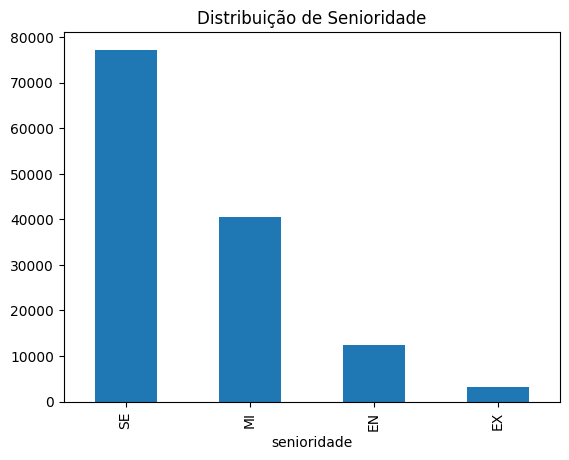

In [7]:
df_limpo['senioridade'].value_counts().plot(kind='bar'.title(),title="Distribuição de Senioridade")

In [8]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

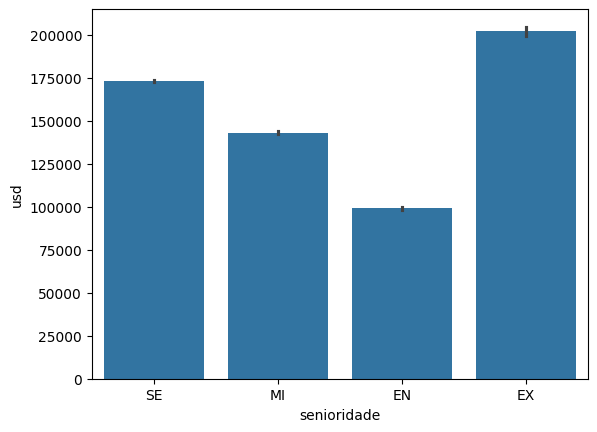

In [9]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [10]:
import matplotlib.pyplot as plt

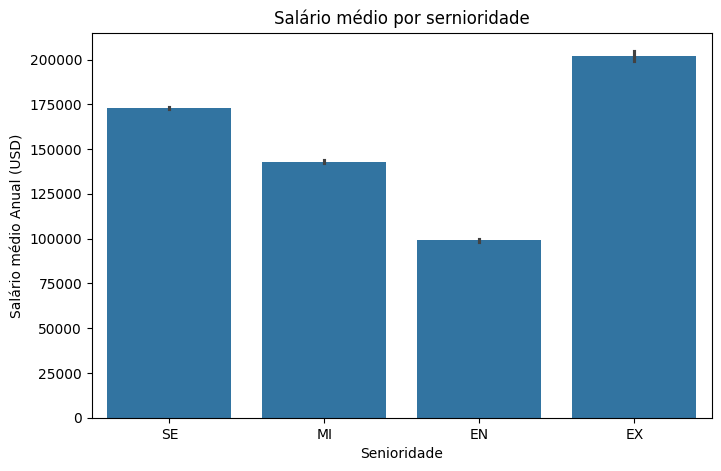

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por sernioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio Anual (USD)')
plt.show()

In [12]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [14]:
ordem=df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='senioridade')

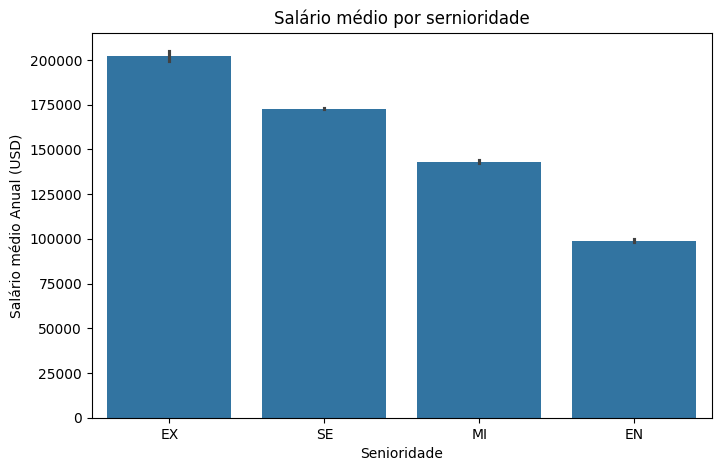

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por sernioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio Anual (USD)')
plt.show()

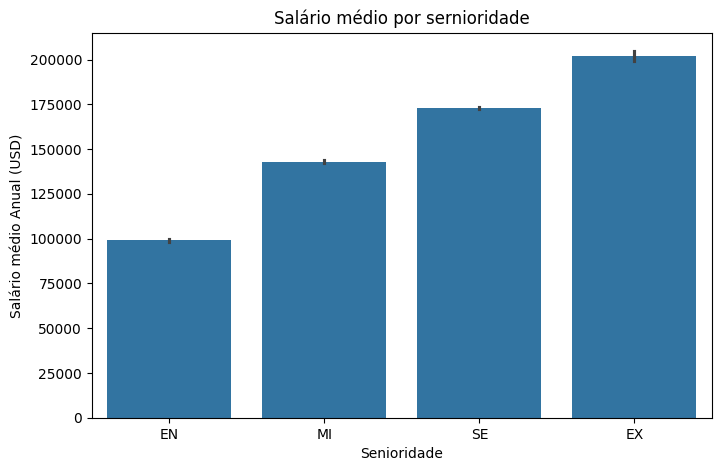

In [19]:
ordem=df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por sernioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio Anual (USD)')
plt.show()

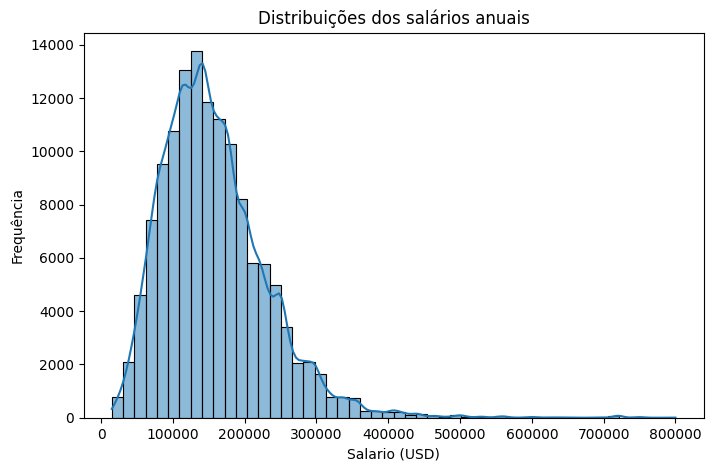

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuições dos salários anuais')
plt.xlabel('Salario (USD)')
plt.ylabel('Frequência')
plt.show()

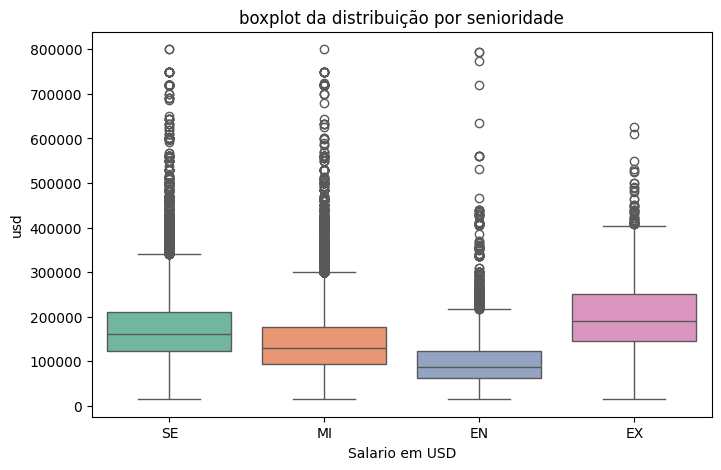

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

ordem=df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem_senioridade = df_limpo['senioridade'].unique()

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('boxplot da distribuição por senioridade')
plt.xlabel('Salario em USD')
plt.show()

In [43]:
import plotly.express as px

In [46]:
# Calculate the average salary by seniority
average_salary_by_seniority = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

# Create the bar chart using Plotly Express
fig = px.bar(average_salary_by_seniority, x='senioridade', y='usd',
             title='Media Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

# Show the plot
fig.show()

In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

# Map numerical values to work type names
work_type_mapping = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}
remoto_contagem['tipo_trabalho'] = remoto_contagem['tipo_trabalho'].map(work_type_mapping)

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho')
fig.update_traces(textinfo='percent+label')
# Show the plot
fig.show()

In [52]:
# Filter for 'Data Scientist' roles
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

# Calculate the average salary by country for Data Scientists
avg_salary_by_country = df_data_scientist.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

# Create an interactive bar chart using Plotly Express
fig = px.bar(avg_salary_by_country, x='residencia', y='usd',
             title='Salário médio de cientista de dados por país',
             labels={'residencia': 'País', 'usd': 'Salário Médio (USD)'})

# Customize the layout (optional)
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()